Write a program to execute the following image enhancement.
• Basic Intensity Transformation (Negation, Log transformation, Power law transformation, Piecewise-Linear
Transformation).
• Convolution, High/low pass/Laplacian filter.

Convolution with 3*3 mask

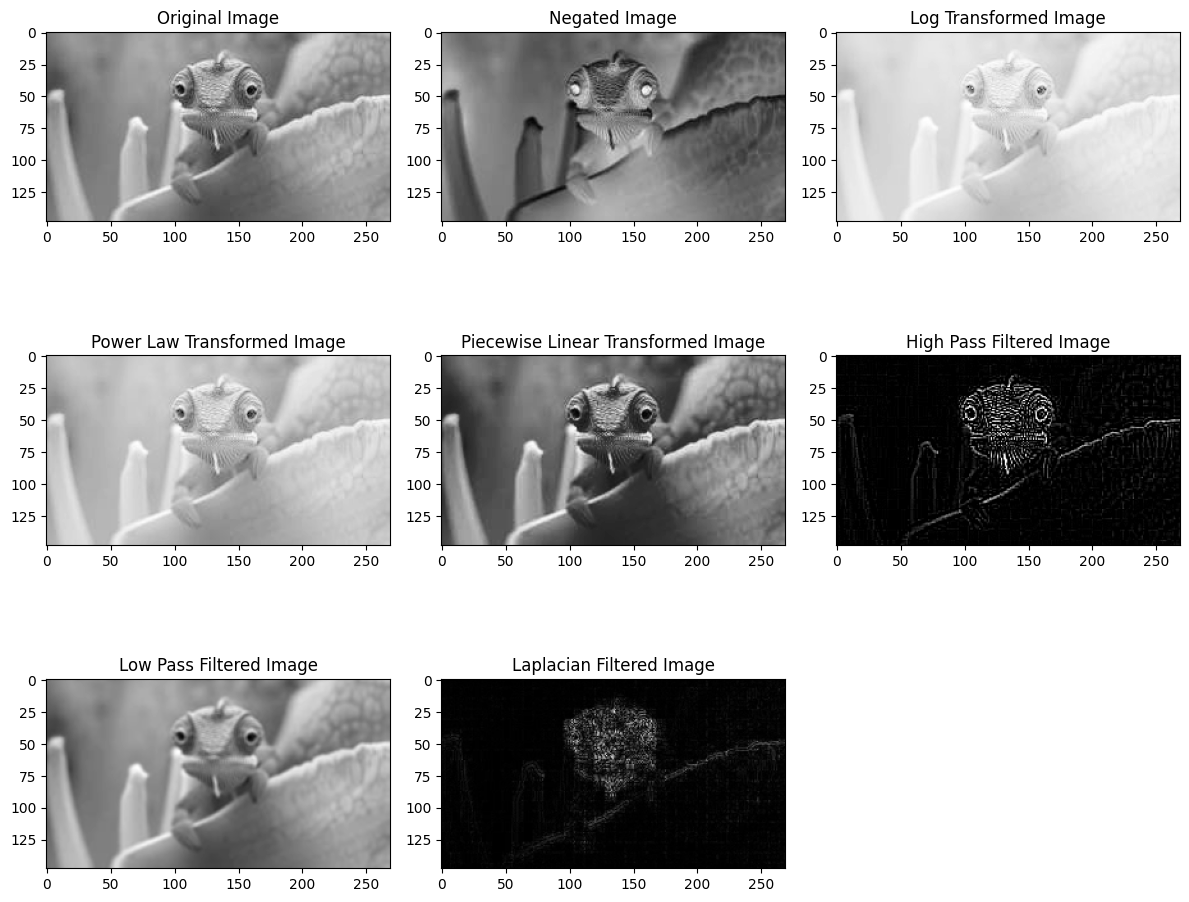

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def negation(image):
    negated_image = 255 - image
    return negated_image

def log_transformation(image):
    log_transformed_image = (255 / np.log(256)) * np.log(1 + image)
    log_transformed_image = np.uint8(log_transformed_image)
    return log_transformed_image

def power_law_transformation(image, gamma):
    power_transformed_image = np.power(image / 255, gamma) * 255
    power_transformed_image = np.uint8(power_transformed_image)
    return power_transformed_image

def piecewise_linear_transformation(image, x1, y1, x2, y2):
    piecewise_linear_image = np.copy(image)
    piecewise_linear_image[image <= x1] = y1 * (piecewise_linear_image[image <= x1] / x1)
    piecewise_linear_image[(image > x1) & (image <= x2)] = ((y2 - y1) / (x2 - x1)) * (piecewise_linear_image[(image > x1) & (image <= x2)] - x1) + y1
    piecewise_linear_image[image > x2] = ((255 - y2) / (255 - x2)) * (piecewise_linear_image[image > x2] - x2) + y2
    piecewise_linear_image = np.uint8(piecewise_linear_image)
    return piecewise_linear_image

def high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

def low_pass_filter(image):
    kernel = np.ones((3, 3), np.float32) / 9
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

def laplacian_filter(image):
    filtered_image = cv2.Laplacian(image, cv2.CV_64F)
    filtered_image = np.uint8(np.absolute(filtered_image))
    return filtered_image

def log_transformation(image):
    # Avoid division by zero by adding a small value to the input image
    image = image + 1e-5
    log_transformed_image = (255 / np.log(256)) * np.log(image)
    # Replace any resulting invalid values with 0
    log_transformed_image[np.isnan(log_transformed_image)] = 0
    log_transformed_image[np.isinf(log_transformed_image)] = 0
    log_transformed_image = np.uint8(log_transformed_image)
    return log_transformed_image


# Load the image
image = cv2.imread("download.jpeg", cv2.IMREAD_GRAYSCALE)

# Perform basic intensity transformations
negated_image = negation(image)
log_transformed_image = log_transformation(image)
power_transformed_image = power_law_transformation(image, gamma=0.5)
piecewise_linear_image = piecewise_linear_transformation(image, x1=100, y1=50, x2=200, y2=200)

# Perform convolution filters
high_pass_filtered_image = high_pass_filter(image)
low_pass_filtered_image = low_pass_filter(image)
laplacian_filtered_image = laplacian_filter(image)

# Display results using matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(negated_image, cmap='gray')
plt.title('Negated Image')

plt.subplot(3, 3, 3)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image')

plt.subplot(3, 3, 4)
plt.imshow(power_transformed_image, cmap='gray')
plt.title('Power Law Transformed Image')

plt.subplot(3, 3, 5)
plt.imshow(piecewise_linear_image, cmap='gray')
plt.title('Piecewise Linear Transformed Image')

plt.subplot(3, 3, 6)
plt.imshow(high_pass_filtered_image, cmap='gray')
plt.title('High Pass Filtered Image')

plt.subplot(3, 3, 7)
plt.imshow(low_pass_filtered_image, cmap='gray')
plt.title('Low Pass Filtered Image')

plt.subplot(3, 3, 8)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')

plt.tight_layout()
plt.show()